In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.constants import c, k_B, M_sun, G, m_p, sigma_sb, m_p
import astropy.units as u
from scipy.sparse import csr_matrix
from scipy.optimize import fsolve, differential_evolution, minimize
import numpy as np
import numba
import sys

sys.path.append('../Numerical_methods')
from bachelor_funcs import Σ_initial, c_s2, tau_R, tau_P, F_rad_strongDW, color_use
from unchanged_values import r, r_au, sD1_log, Ω, T_req

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

In [5]:
def T_vis(T, Σ):
    return ((0.5 * sigma_sb**(-1) * (3/8 * tau_R(T, Σ) + 0.5 * tau_P(tau_R(T, Σ))**(-1)) * F_rad_strongDW(T, Σ))**(0.25)).decompose()

In [6]:
def guess_T(T):
    T_new4 = T_vis(T, Σ_initial(r_au)).value**4 + T_req.value**4
    return T_new4**0.25 * u.K

In [7]:
i_damp = np.where(r >= 10)[0][0]
r_au[i_damp]

<Quantity 10.23371799 AU>

In [8]:
T0 = T_req
T_list = [T_req]
for i in range(10):
    T_new = guess_T(T_list[-1])
    if i < 5:
        T_new[T_new > 2800 * u.K] = 2800 *u.K
    T_damp = (0.5*(T_list[-1]**4 + T_new**4))**0.25
    T_list.append(T_damp)

In [9]:
#Does not work:

#T_damp = ((T_list[-1][r < 10]**4 + T_new[r < 10]**4))**0.25
#T_list.append(np.concatenate((T_damp, T_new[r > 10])))
#Makes a big cut off (discontinuity) at r = 10 Au
len(T_list)

11

[Text(0.5, 1.0, 'The temperature seem to increase over time and does not converge as wanted'),
 (0.01, 100.0),
 Text(0, 0.5, 'T [K]'),
 Text(0.5, 0, 'r [AU]'),
 (50, 10000.0)]

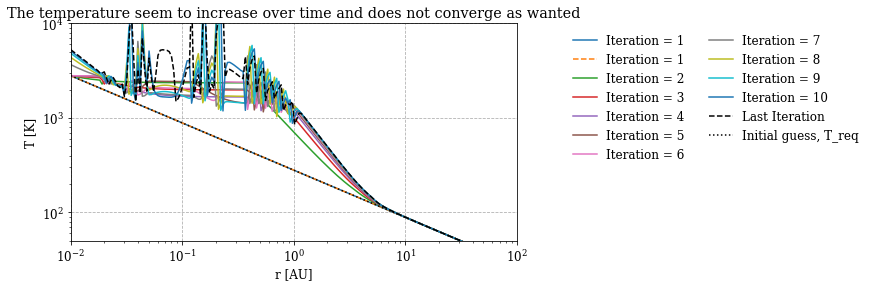

In [10]:
fig, axs = plt.subplots(figsize = (8,4))
plt.grid(ls='--')
for i, T in enumerate(T_list[1:]):
    if len(T_list) <= 11:
        axs.loglog(r, T_list[i], label = f'Iteration = {i+1}', ls='-')

    if len(T_list) <= 101 and i % 10 == 0 :
        axs.loglog(r, T_list[i], label = f'Iteration = {i+1}', ls='--')

    elif len(T_list) <= 1001 and i % 100 == 0 :
        axs.loglog(r, T_list[i], label = f'Iteration = {i+1}', ls='--')

    elif i % 10000 == 0:
        axs.loglog(r, T_list[i], label = f'Iteration = {i+1}')

axs.loglog(r, T_list[-1], label = f'Last Iteration', c='black', ls='--')       
axs.loglog(r, T_req, label = 'Initial guess, T_req', c = 'black', ls = ':')
axs.legend(frameon = False, bbox_to_anchor = (1.1,1), ncol = 2)
axs.set(title='The temperature seem to increase over time and does not converge as wanted', xlim = (0.01, 1e2), ylabel = 'T [K]', xlabel = 'r [AU]', ylim = (50, 1e4))

In [11]:
T0 = T_req
T_list = [T_req]
for i in range(10):
    T_new = guess_T(T_list[-1])
    if i < 5:
        T_new[T_new > 2800 * u.K] = 2800 *u.K
    T_damp = (T_list[-1]**4 + T_new**4)**0.25
    T_list.append(T_damp)

In [12]:
i = np.where(r > 20)[0][0]
print('At'+f' {r_au[i]:1.2f}')
T0 = T_req
T_list2 = [T_req]
print('No damp')
for _ in range(10):
    T_new = guess_T(T_list2[-1])
    print(f'T_req: {T_req[i]:2.3f} T_vis: {T_vis(T_list2[-1], Σ_initial(r_au))[i]:2.3f}, Est. T: {T_new[i]:2.3f}')
    T_list2.append(T_new)

print('With damp')
for _ in range(10):
    T_new = guess_T(T_list2[-1])
    T_damp= 0.5 * (T_list2[-1] + T_new)
    T_damp1 = (T_list2[-1]**4 + T_new**4)**0.25
    print(f'T_req: {T_req[i]:2.3f} T_vis: {T_vis(T_list2[-1], Σ_initial(r_au))[i]:2.3f}, Est. T: {T_damp[i]:2.3f}')
    T_list2.append(T_damp)

At 20.47 AU
No damp
T_req: 61.893 K T_vis: 9.728 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
With damp
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T: 61.902 K
T_req: 61.893 K T_vis: 9.730 K, Est. T:

In [13]:
(62.090**4 + 62.100**4)**0.25

73.84381652427201